### <p style="text-align: center;">Climate Change Knowledge Portal <br/> Historical Data and Projections</p>
#### <p style="text-align: center;">DSC540 – Data Preparation <br/> Term Project - Milestone 4 <br/> Winter 2020 <br/> Manish Kalkar</p>
### <p style="text-align: center;">Connecting to an API / Pulling in the Data and Cleaning / Formatting</p>

## Historical Data - Average Yearly Temperatures for United States

### Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Connect to an API and import Average Yearly temperature (Historical) data in JSON format into the data frame

In [10]:
df_1901_2012 = pd.read_json (r'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/USA.json')
df_historical = df_1901_2012
df_historical

,year,data
0,1901,6.618749
1,1902,6.464327
2,1903,6.073844
3,1904,6.149883
4,1905,6.599617
...,...,...
107,2008,6.935361
108,2009,7.102065
109,2010,7.409120
110,2011,7.405612


### Change order of the header columns - Swap data with year

In [11]:
df_historical = df_historical[['data', 'year']]
df_historical

,data,year
0,6.618749,1901
1,6.464327,1902
2,6.073844,1903
3,6.149883,1904
4,6.599617,1905
...,...,...
107,6.935361,2008
108,7.102065,2009
109,7.409120,2010
110,7.405612,2011


### Replace Headers

In [12]:
df_historical = df_historical.rename(columns={'data': 'Average_Temperature_Deg_C'})
df_historical = df_historical.rename(columns={'year': 'Year'})
df_historical

,Average_Temperature_Deg_C,Year
0,6.618749,1901
1,6.464327,1902
2,6.073844,1903
3,6.149883,1904
4,6.599617,1905
...,...,...
107,6.935361,2008
108,7.102065,2009
109,7.409120,2010
110,7.405612,2011


### Format data

### Check for duplicates

In [13]:
print("Average Temperature is duplictaed - {}".format(any(df_historical.Average_Temperature_Deg_C.duplicated())))
print("Year is duplictaed - {}".format(any(df_historical.Year.duplicated())))

Average Temperature is duplictaed - False
Year is duplictaed - False


### Check for NaN values

In [14]:
print("The column Average Temperature contains NaN - %r " % df_historical.Average_Temperature_Deg_C.isnull().values.any())
print("The column Year contains NaN - %r " % df_historical.Year.isnull().values.any())

The column Average Temperature contains NaN - False 
The column Year contains NaN - False 


### Fix inconsistent values

####  Average Temperature column has inconsistent decimal places

#### Round up Average Temperature Values to "Two" decimals

In [15]:
df_historical["Average_Temperature_Deg_C"] = round(df_historical.Average_Temperature_Deg_C, 2)
df_historical

,Average_Temperature_Deg_C,Year
0,6.62,1901
1,6.46,1902
2,6.07,1903
3,6.15,1904
4,6.60,1905
...,...,...
107,6.94,2008
108,7.10,2009
109,7.41,2010
110,7.41,2011


### Identify Outliers - Create a box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x24d2c4b3040>,
 'caps': [<matplotlib.lines.Line2D at 0x24d2c4b3700>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d2c49bca0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d2c4b3dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d2c4bd100>],
 'means': []}

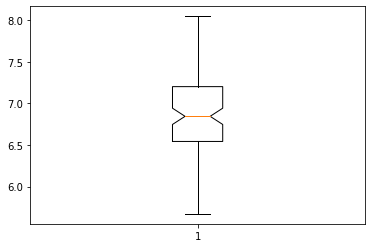

In [16]:
plt.boxplot(df_historical.Average_Temperature_Deg_C, notch=True)

In [17]:
# Find maximum average temperature - Future Projections
df_historical.Average_Temperature_Deg_C.max()

8.05

In [18]:
# Find minimum average temperature - Future Projections
df_historical.Average_Temperature_Deg_C.min()

5.67

##### Data in this column in the interval (5.67 Deg C, 8.05 Deg C). However, the main concentration of the data is between 6.6 Deg C to 7.2 Deg C. Anything beyond 8 Deg C and bellow 6 Deg C are outliers.

### Report the size before getting rid of the outliers

In [19]:
df_historical.shape

(112, 2)

### Ger rid of the outliers

In [21]:
df_historical_minus_outliers = df_historical[(df_historical['Average_Temperature_Deg_C'] < 8) & (df_historical['Average_Temperature_Deg_C'] > 6)]

### Report the size after getting rid of the outliers

In [22]:
df_historical_minus_outliers.shape

(110, 2)

### Export Dataframe into Output csv File - Future Projections

In [23]:
df_historical_minus_outliers.to_csv('API_Historical_Data_Average_Temperatures_USA.csv', index=False)

## Future Projections - Average Yearly (Ranges) Temperatures for United States

### Connect to an API and import data in CSV format into the data frame

In [27]:
df_2020_2039_gcm = pd.read_csv (r'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/annualavg/tas/2020/2039/USA.csv')
df_2040_2059_gcm = pd.read_csv (r'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/annualavg/tas/2040/2059/USA.csv')
df_2060_2079_gcm = pd.read_csv (r'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/annualavg/tas/2060/2079/USA.csv')
df_2080_2099_gcm = pd.read_csv (r'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/annualavg/tas/2080/2099/USA.csv')

In [28]:
# GCM column displayes various models used to generate data (annual temperatures).
# All models are applied for specific scenario (scenario column)

df_2020_2039_gcm

,GCM,var,scenario,from_year,to_year,annual
0,bccr_bcm2_0,tas,a2,2020,2039,5.153055
1,bccr_bcm2_0,tas,b1,2020,2039,5.160215
2,cccma_cgcm3_1,tas,a2,2020,2039,7.168759
3,cccma_cgcm3_1,tas,b1,2020,2039,7.114585
4,cnrm_cm3,tas,a2,2020,2039,7.176206
5,cnrm_cm3,tas,b1,2020,2039,7.261905
6,csiro_mk3_5,tas,a2,2020,2039,11.526758
7,csiro_mk3_5,tas,b1,2020,2039,11.294736
8,gfdl_cm2_0,tas,a2,2020,2039,5.109728
9,gfdl_cm2_0,tas,b1,2020,2039,4.987581


### Determine average mean annual temperature from all models (GCM) and scenarios for a year range 2020 - 2039

In [29]:
df_2020_2039_gcm['annual'].mean()

7.48328907650361

### Create a new dataframe with average mean annual temperature determined above

In [30]:
Avg_Temp_2020_2039 = {'Year': ['2020-2039'],
                      'Average_Temperature_Deg_C': [df_2020_2039_gcm['annual'].mean()]
                     }

df_2020_2039 = pd.DataFrame(Avg_Temp_2020_2039, columns = ['Year', 'Average_Temperature_Deg_C'])
df_2020_2039

,Year,Average_Temperature_Deg_C
0,2020-2039,7.483289


### Repeate the above procedure by calculating mean annual temperatures for all Year Ranges by creating the new dataframe for each Year Range

In [31]:
Avg_Temp_2040_2059 = {'Year': ['2040-2059'],
                      'Average_Temperature_Deg_C': [df_2040_2059_gcm['annual'].mean()]
                     }

df_2040_2059 = pd.DataFrame(Avg_Temp_2040_2059, columns = ['Year', 'Average_Temperature_Deg_C'])
df_2040_2059

,Year,Average_Temperature_Deg_C
0,2040-2059,8.195466


In [32]:
Avg_Temp_2060_2079 = {'Year': ['2060-2079'],
                      'Average_Temperature_Deg_C': [df_2060_2079_gcm['annual'].mean()]
                     }

df_2060_2079 = pd.DataFrame(Avg_Temp_2060_2079, columns = ['Year', 'Average_Temperature_Deg_C'])
df_2060_2079

,Year,Average_Temperature_Deg_C
0,2060-2079,9.047639


In [33]:
Avg_Temp_2080_2099 = {'Year': ['2080-2099'],
                      'Average_Temperature_Deg_C': [df_2080_2099_gcm['annual'].mean()]
                     }

df_2080_2099 = pd.DataFrame(Avg_Temp_2080_2099, columns = ['Year', 'Average_Temperature_Deg_C'])
df_2080_2099

,Year,Average_Temperature_Deg_C
0,2080-2099,9.961628


### Append all newly created data frames into one single data frame
### Display Data frame - Average mean temperatures (Future Projections) for all year ranges

In [34]:
df_projections = df_2020_2039.append(df_2040_2059, ignore_index = True).append(df_2060_2079, ignore_index = True).append(df_2080_2099, ignore_index = True)
df_projections

,Year,Average_Temperature_Deg_C
0,2020-2039,7.483289
1,2040-2059,8.195466
2,2060-2079,9.047639
3,2080-2099,9.961628


### Change order of the header columns - Swap Average_Temperature_Deg_C with Year

In [35]:
df_projections = df_projections[['Average_Temperature_Deg_C', 'Year']]
df_projections

,Average_Temperature_Deg_C,Year
0,7.483289,2020-2039
1,8.195466,2040-2059
2,9.047639,2060-2079
3,9.961628,2080-2099


### Format data

### Check for duplicates

In [36]:
print("Average Temperature is duplictaed - {}".format(any(df_projections.Average_Temperature_Deg_C.duplicated())))
print("Year is duplictaed - {}".format(any(df_projections.Year.duplicated())))

Average Temperature is duplictaed - False
Year is duplictaed - False


### Check for NaN values

In [37]:
print("The column Average Temperature contains NaN - %r " % df_projections.Average_Temperature_Deg_C.isnull().values.any())
print("The column Year contains NaN - %r " % df_projections.Year.isnull().values.any())

The column Average Temperature contains NaN - False 
The column Year contains NaN - False 


### Fix inconsistent values

####  Average Temperature column has inconsistent decimal places

#### Round up Average Temperature Values to "Two" decimals

In [38]:
df_projections["Average_Temperature_Deg_C"] = round(df_projections.Average_Temperature_Deg_C, 2)
df_projections

,Average_Temperature_Deg_C,Year
0,7.48,2020-2039
1,8.20,2040-2059
2,9.05,2060-2079
3,9.96,2080-2099


### Identify Outliers - Create a box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x24d2c5677f0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d2c567ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d2c567490>],
 'medians': [<matplotlib.lines.Line2D at 0x24d2c5715e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d2c5718e0>],
 'means': []}

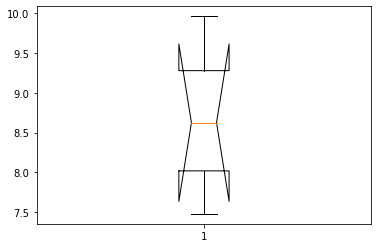

In [39]:
plt.boxplot(df_projections.Average_Temperature_Deg_C, notch=True)

In [40]:
# Find maximum average temperature - Future Projections
df_projections.Average_Temperature_Deg_C.max()

9.96

In [41]:
# Find minimum average temperature - Future Projections
df_projections.Average_Temperature_Deg_C.min()

7.48

### Data in this column in the interval (7.48 Deg C, 9.96 Deg C).
### Average temperatures are determined for only 4 Year ranges.
### So there are no outliers.

### Export Dataframe into Output csv File - Future Projections

In [42]:
df_projections.to_csv('API_Future_Projections_Average_Temperatures_USA.csv', index=False)